In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !unzip "/content/drive/MyDrive/Pose estimation/Dataset/annotations_trainval2017.zip" -d "/content/drive/MyDrive/Pose estimation/Dataset/"

In [3]:
import os
import pandas as pd
import tensorflow.compat.v1 as tf
from PIL import Image
from collections import namedtuple
import glob
import io

In [4]:
import numpy as np
import json

In [5]:
root_dir = "/content/drive/MyDrive/Pose estimation"

In [5]:
def compile_examples(json_annotations):

  file_handle = open(json_annotations)
  annotations = json.load(file_handle)

  image_urls = list()

  for image_detail in annotations["images"]:
    image_urls.append(image_detail["coco_url"])

  image_ids = list()

  for single_annotation in annotations["annotations"]:
    image_ids.append(single_annotation["image_id"])

  urls_dict = dict()

  for img_url in image_urls:
    urls_dict[img_url.split("/")[-1]] = img_url

  image_details = dict()
  images_added = list()

  for single_annotation in annotations["annotations"]:

    img_filename = "000000"+str(single_annotation["image_id"])+".jpg"

    keypoints = np.array(single_annotation["keypoints"]).reshape(17,3)
    gt_validity = keypoints[:,2] > 0

    if img_filename in list(urls_dict.keys()) and sum(gt_validity) > 0 \
    and single_annotation["iscrowd"] == 0 and single_annotation["bbox"][2] > 48 and single_annotation["bbox"][3] > 64:

      images_added.append(img_filename)
      image_details[img_filename] = dict()
      image_details[img_filename]["url"] = urls_dict[img_filename]
      image_details[img_filename]["num_keypoints"] = single_annotation["num_keypoints"]
      image_details[img_filename]["bbox"] = single_annotation["bbox"]
      image_details[img_filename]["keypoints"] = single_annotation["keypoints"]

  return image_details

In [ ]:
training_annotations = compile_examples("/content/drive/MyDrive/Pose estimation/Dataset/annotations/person_keypoints_train2017.json")

json_string = json.dumps(training_annotations)
json_file_handle = open("training_annotations.json","w")
json_file_handle.write(json_string)
json_file_handle.close()

In [ ]:
cv_annotations = compile_examples("/content/drive/MyDrive/Pose estimation/Dataset/annotations/person_keypoints_val2017.json")

json_string = json.dumps(cv_annotations)
json_file_handle = open("cv_annotations.json","w")
json_file_handle.write(json_string)
json_file_handle.close()

In [6]:
training_file_handle = open("/content/drive/MyDrive/Pose estimation/Dataset/training_annotations.json")
training_annotations = json.load(training_file_handle)

In [7]:
cv_file_handle = open("/content/drive/MyDrive/Pose estimation/Dataset/cv_annoation.json")
cv_annotations = json.load(cv_file_handle )

In [8]:
import requests
import time
from requests.exceptions import ConnectionError

In [ ]:
def download_image(image_filename):

  tries = 0
  while True:
    tries = tries + 1
    try:
      r = requests.get(training_annotations[image_filename]["url"])
      file_handle = open(os.path.join("/content/drive/MyDrive/Pose estimation/person_train_images",image_filename),"wb")
      file_handle.write(r.content)
      file_handle.close()
      print("Written {}".format(image_filename))
      break
    except ConnectionError as err:
      if tries == 11:
        raise err
      else:
        time.sleep(1)

In [ ]:
def download_cv_image(image_filename):

  tries = 0
  while True:
    tries = tries + 1
    try:
      r = requests.get(cv_annotations[image_filename]["url"])
      file_handle = open(os.path.join("/content/drive/MyDrive/Pose estimation/person_cv_train_images",image_filename),"wb")
      file_handle.write(r.content)
      file_handle.close()
      print("Written {}".format(image_filename))
      break
    except ConnectionError as err:
      if tries == 11:
        raise err
      else:
        time.sleep(1)

In [ ]:
from concurrent.futures import ThreadPoolExecutor

In [ ]:
with ThreadPoolExecutor(max_workers=4) as executor:
  executor.map(download_image,training_annotations.keys())

Streaming output truncated to the last 5000 lines.
Written 000000236818.jpg
Written 000000453682.jpg
Written 000000105402.jpg
Written 000000450052.jpg
Written 000000344043.jpg
Written 000000449808.jpg
Written 000000276062.jpg
Written 000000374846.jpg
Written 000000231987.jpg
Written 000000348954.jpg
Written 000000571768.jpg
Written 000000413164.jpg
Written 000000351141.jpg
Written 000000232025.jpg
Written 000000160932.jpg
Written 000000287361.jpg
Written 000000130735.jpg
Written 000000378471.jpg
Written 000000574492.jpg
Written 000000323626.jpg
Written 000000462123.jpg
Written 000000326508.jpg
Written 000000321238.jpg
Written 000000197270.jpg
Written 000000190229.jpg
Written 000000340242.jpg
Written 000000430335.jpg
Written 000000271298.jpg
Written 000000183395.jpg
Written 000000458519.jpg
Written 000000222078.jpg
Written 000000512662.jpg
Written 000000472439.jpg
Written 000000212859.jpg
Written 000000300052.jpg
Written 000000507489.jpg
Written 000000487649.jpg
Written 000000542180.jpg

In [ ]:
with ThreadPoolExecutor(max_workers=4) as executor:
  executor.map(download_cv_image,cv_annotations.keys())

Written 000000433915.jpg
Written 000000292456.jpg
Written 000000139099.jpg
Written 000000425226.jpg
Written 000000458992.jpg
Written 000000481567.jpg
Written 000000251140.jpg
Written 000000165681.jpg
Written 000000102331.jpg
Written 000000395180.jpg
Written 000000579902.jpg
Written 000000182611.jpg
Written 000000279278.jpg
Written 000000357737.jpg
Written 000000494869.jpg
Written 000000329219.jpg
Written 000000546976.jpg
Written 000000380706.jpg
Written 000000122166.jpg
Written 000000394199.jpg
Written 000000464476.jpg
Written 000000424162.jpg
Written 000000492937.jpg
Written 000000169996.jpg
Written 000000397133.jpg
Written 000000146667.jpg
Written 000000289343.jpg
Written 000000422706.jpg
Written 000000261888.jpg
Written 000000445834.jpg
Written 000000577932.jpg
Written 000000338304.jpg
Written 000000246963.jpg
Written 000000507975.jpg
Written 000000176857.jpg
Written 000000534605.jpg
Written 000000356387.jpg
Written 000000226408.jpg
Written 000000554002.jpg
Written 000000210299.jpg


In [9]:
import matplotlib.pyplot as plt
import cv2
from PIL import UnidentifiedImageError
from scipy.ndimage import gaussian_filter

In [10]:
def create_gt_heatmap_labels(img,annotations,resize_shape=(64,48)):

  gt_heatmap = np.zeros(shape=(17,resize_shape[0],resize_shape[1]))
  keypoints = np.array(annotations[img]["keypoints"]).reshape(17,3)
  xmin,ymin,w,h = annotations[img]["bbox"]
  bbox_offset = np.array([xmin,ymin,0])
  bbox_dims = np.array([w,h,1])
  gt_heatmap_dims = np.array([resize_shape[1],resize_shape[0],1])
  keypoints = np.round((keypoints - bbox_offset)*gt_heatmap_dims/bbox_dims).astype(int)

  for i in range(17):

    if keypoints[i,2] > 0:
      y = keypoints[i,0]
      x = keypoints[i,1]

      if x < 0 or y < 0 or x >= resize_shape[0] or y >= resize_shape[1]:
        keypoints[i,2] = 0.0
        continue

      gt_heatmap[i,x,y] = 1.0
      gt_heatmap[i,:,:] = gaussian_filter(input=gt_heatmap[i,:,:],sigma=2,mode="constant",cval=0.0)
      gt_heatmap[i,:,:] = gt_heatmap[i,:,:]/np.max(gt_heatmap[i,:,:]) #Doubt in this

  gt_validity = keypoints[:,2] > 0
  gt_validity = gt_validity.reshape(gt_validity.shape[0],1,1)

  return gt_heatmap.astype(float), gt_validity.astype(float)

In [11]:
def train_generator(train_images,annotations,batch_size=32,resize_shape=(256,192)):

  num_train_images = len(train_images)
  train_images = np.array(train_images)
  img_norm_mean = np.array([0.485,0.456,0.456])
  img_norm_std = np.array([0.229,0.224,0.225])

  while True:

    for offset in range(0,num_train_images,batch_size):
      
      batch_images = list(np.random.choice(train_images,size=batch_size,replace=False))
      images_batch = []
      gt_heatmaps_batch = []
      gt_validities_batch = []

      for img in batch_images:

        try:
          image = Image.open(os.path.join("/content/drive/MyDrive/Pose estimation/person_train_images",img))
          xmin,ymin,w,h = annotations[img]["bbox"]
          cropped_image = image.resize(size=(resize_shape[1],resize_shape[0]),box=(xmin,ymin,xmin+w,ymin+h))
          cropped_image = np.array(cropped_image)

          if len(cropped_image.shape) != 3:
            cropped_image = np.stack((cropped_image,)*3,axis=-1)

          cropped_image = cropped_image.astype(float)/255.0
          cropped_image = (cropped_image - img_norm_mean)/img_norm_std

          cropped_image = cropped_image.reshape(resize_shape[0],resize_shape[1],3)
          images_batch.append(cropped_image)

          gt_heatmap,gt_validity = create_gt_heatmap_labels(img,annotations)
          gt_heatmaps_batch.append(gt_heatmap)
          gt_validities_batch.append(gt_validity)

        except UnidentifiedImageError as err:
          continue

      images_batch = np.array(images_batch)
      gt_heatmaps_batch = np.array(gt_heatmaps_batch)
      gt_validities_batch = np.array(gt_validities_batch)

      yield images_batch,gt_heatmaps_batch,gt_validities_batch

In [12]:
def cv_generator(cv_images,annotations,batch_size=32,resize_shape=(256,192)):

  num_cv_train_images = len(cv_images)
  img_norm_mean = np.array([0.485,0.456,0.456])
  img_norm_std = np.array([0.229,0.224,0.225])

  while True:

    for offset in range(0,num_cv_train_images,batch_size):
      
      batch_images = cv_images[offset:offset+batch_size]
      images_batch = []
      gt_heatmaps_batch = []
      gt_validities_batch = []

      for img in batch_images:

        try:
          image = Image.open(os.path.join("/content/drive/MyDrive/Pose estimation/person_cv_train_images",img))
          xmin,ymin,w,h = annotations[img]["bbox"]
          cropped_image = image.resize(size=(resize_shape[1],resize_shape[0]),box=(xmin,ymin,xmin+w,ymin+h))
          cropped_image = np.array(cropped_image)

          if len(cropped_image.shape) != 3:
            cropped_image = np.stack((cropped_image,)*3,axis=-1)

          cropped_image = cropped_image.astype(float)/255.0
          cropped_image = (cropped_image - img_norm_mean)/img_norm_std

          cropped_image = cropped_image.reshape(resize_shape[0],resize_shape[1],3)
          images_batch.append(cropped_image)

          gt_heatmap,gt_validity = create_gt_heatmap_labels(img,annotations)
          gt_heatmaps_batch.append(gt_heatmap)
          gt_validities_batch.append(gt_validity)

        except UnidentifiedImageError as err:
          continue

      images_batch = np.array(images_batch)
      gt_heatmaps_batch = np.array(gt_heatmaps_batch)
      gt_validities_batch = np.array(gt_validities_batch)

      yield images_batch,gt_heatmaps_batch,gt_validities_batch

In [13]:
from keras.layers import Conv2D,Conv2DTranspose,BatchNormalization
from keras.applications import resnet_v2
from keras.models import Model
from keras.layers import Input
from keras.layers import ReLU
from keras.layers import Reshape
from keras.initializers import random_normal
import tensorflow as tf
import keras

In [14]:
def create_pretrained_pose_resnet(resize_shape=(64,48)):

  images_batch = Input(shape=(256,192,3))
  pretrained_resnet = resnet_v2.ResNet50V2(include_top=False,input_shape=(256,192,3))

  pretrained_resnet.trainable = False

  pretrained_resnet_output = pretrained_resnet(images_batch,training=False)

  pretrained_resnet_out = Conv2DTranspose(filters=256,kernel_size=4,strides=2,padding="same",
                                          kernel_initializer=random_normal(stddev=0.001))(pretrained_resnet_output)
  pretrained_resnet_out = BatchNormalization()(pretrained_resnet_out)
  pretrained_resnet_out = ReLU()(pretrained_resnet_out)

  pretrained_resnet_out = Conv2DTranspose(filters=256,kernel_size=4,strides=2,padding="same",
                                          kernel_initializer=random_normal(stddev=0.001))(pretrained_resnet_out)
  pretrained_resnet_out = BatchNormalization()(pretrained_resnet_out)
  pretrained_resnet_out = ReLU()(pretrained_resnet_out)

  pretrained_resnet_out = Conv2DTranspose(filters=256,kernel_size=4,strides=2,padding="same",
                                          kernel_initializer=random_normal(stddev=0.001))(pretrained_resnet_out)
  pretrained_resnet_out = BatchNormalization()(pretrained_resnet_out)
  pretrained_resnet_out = ReLU()(pretrained_resnet_out)

  pretrained_resnet_out = Conv2D(filters=17,kernel_size=1,kernel_initializer=random_normal(stddev=0.001))(pretrained_resnet_out)

  pretrained_resnet_out = Reshape((17,resize_shape[0],resize_shape[1]))(pretrained_resnet_out)

  pretrained_pose_resnet = Model(images_batch,pretrained_resnet_out)

  return pretrained_pose_resnet

In [15]:
mse_loss_fn = tf.keras.losses.MeanSquaredError()

In [16]:
#Doubt 
def mse_loss(heatmap_pred,heatmap_train,heatmap_val_train):

  heatmap_pred = heatmap_val_train * tf.cast(heatmap_pred,tf.float64)
  heatmap_train = heatmap_val_train * heatmap_train
  mse = mse_loss_fn(y_true=heatmap_train,y_pred=tf.cast(heatmap_pred,tf.float64))
  return mse

In [17]:
pose_estimate_optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.00001)

In [18]:
pose_estimate_finetune_optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0000001)

In [19]:
pretrained_pose_resnet = create_pretrained_pose_resnet()

In [20]:
pretrained_pose_resnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 192, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 8, 6, 2048)        23564800  
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 12, 256)      8388864   
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 16, 12, 256)      1024      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 16, 12, 256)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 24, 256)      104883

In [21]:
pose_estimate_checkpoint_dir = os.path.join(root_dir,"Checkpoints")
checkpoint_prefix = os.path.join(pose_estimate_checkpoint_dir,"ckpt")
checkpoint = tf.train.Checkpoint(optimizer=pose_estimate_optimizer,model=pretrained_pose_resnet)

In [22]:
pose_estimate_finetune_checkpoint_dir = "/content/drive/MyDrive/Pose estimation/Finetune_checkpoints"
finetune_checkpoint_prefix = os.path.join(pose_estimate_finetune_checkpoint_dir,"ckpt")
finetune_checkpoint = tf.train.Checkpoint(optimizer = pose_estimate_finetune_optimizer,model = pretrained_pose_resnet)

In [23]:
@tf.function
def train_step(images_batch ,heatmap_train_batch ,heatmap_val_batch):
    
    with tf.GradientTape() as pose_estimate_tape:
        pretrained_pose_resnet.layers[1].trainable = False
        
        heatmap_pred_batch = pretrained_pose_resnet(images_batch,training = True)
        pose_estimate_loss = mse_loss(heatmap_pred=heatmap_pred_batch,heatmap_train=heatmap_train_batch,heatmap_val_train=heatmap_val_batch)
        
        pose_estimate_gradient = pose_estimate_tape.gradient(pose_estimate_loss,pretrained_pose_resnet.trainable_variables)
        pose_estimate_optimizer.apply_gradients(zip(pose_estimate_gradient ,pretrained_pose_resnet.trainable_variables))
        
    return heatmap_pred_batch , pose_estimate_loss
        

In [24]:
@tf.function
def finetune_train_step(images_batch ,heatmap_train_batch ,heatmap_val_batch):
    
    pretrained_pose_resnet.trainable = True
    
    for layer in pretrained_pose_resnet.layers[1].layers[:-13]:
        layer.trainable = False
    
    with tf.GradientTape() as pose_estimate_tape:
        heatmap_pred_batch = pretrained_pose_resnet(images_batch,training = True)
        pose_estimate_loss = mse_loss(heatmap_pred=heatmap_pred_batch,heatmap_train=heatmap_train_batch,heatmap_val_train=heatmap_val_batch)
        pose_estimate_gradient = pose_estimate_tape.gradient(pose_estimate_loss ,pretrained_pose_resnet.trainable_variables)
        pose_estimate_finetune_optimizer.apply_gradients(zip(pose_estimate_gradient,pretrained_pose_resnet.trainable_variables))
    
    return heatmap_pred_batch ,pose_estimate_loss

In [25]:
@tf.function
def cv_step(cv_images_batch ,cv_heatmap_train_batch,cv_heatmap_val_batch):
    
    pretrained_pose_resnet.trainable =False
    cv_heatmap_pred_batch = pretrained_pose_resnet(cv_images_batch,training = False)
    pose_estimate_loss = mse_loss(heatmap_pred=cv_heatmap_pred_batch,heatmap_train=cv_heatmap_train_batch,
                                  heatmap_val_train=cv_heatmap_val_batch)
    
    return cv_heatmap_pred_batch,pose_estimate_loss

In [26]:
# ORIGINAL FROM HERE:
# https://github.com/microsoft/human-pose-estimation.pytorch/blob/715d29e55f59ae555116542e85ed7175d57120e6/lib/core/evaluate.py
# ------------------------------------------------------------------------------
# Copyright (c) Microsoft
# Licensed under the MIT License.
# Written by Bin Xiao (Bin.Xiao@microsoft.com)
# ------------------------------------------------------------------------------
# Calculates Percentage of Correct Key-points (PCK) accuracy
# A detected joint is considered correct if the distance between the predicted 
# and the true joint is within a certain threshold. 


def get_max_preds(batch_heatmaps):
    '''
    get predictions from score maps
    heatmaps: numpy.ndarray([batch_size, num_joints, height, width])
    '''

    assert isinstance(batch_heatmaps, np.ndarray), 'batch_heatmaps should be numpy.ndarray'
    assert batch_heatmaps.ndim == 4, 'batch_images should be 4-ndim'

    batch_size = batch_heatmaps.shape[0]
    num_joints = batch_heatmaps.shape[1]
    width = batch_heatmaps.shape[3]
    heatmaps_reshaped = batch_heatmaps.reshape((batch_size, num_joints, -1))
    idx = np.argmax(heatmaps_reshaped, 2)
    maxvals = np.amax(heatmaps_reshaped, 2)

    maxvals = maxvals.reshape((batch_size, num_joints, 1))
    idx = idx.reshape((batch_size, num_joints, 1))

    preds = np.tile(idx, (1, 1, 2)).astype(np.float32)

    preds[:, :, 0] = (preds[:, :, 0]) % width
    preds[:, :, 1] = np.floor((preds[:, :, 1]) / width)

    pred_mask = np.tile(np.greater(maxvals, 0.0), (1, 1, 2))
    pred_mask = pred_mask.astype(np.float32)

    preds *= pred_mask
    return preds, maxvals

In [27]:
def calc_dists(preds, target, normalize):
    preds = preds.astype(np.float32)
    target = target.astype(np.float32)
    dists = np.zeros((preds.shape[1], preds.shape[0]))
    for n in range(preds.shape[0]):
        for c in range(preds.shape[1]):
            if target[n, c, 0] > 1 and target[n, c, 1] > 1:
                normed_preds = preds[n, c, :] / normalize[n]
                normed_targets = target[n, c, :] / normalize[n]
                dists[c, n] = np.linalg.norm(normed_preds - normed_targets)
            else:
                dists[c, n] = -1
    return dists

In [28]:
def dist_acc(dists, thr=0.5):
    ''' Return percentage below threshold while ignoring values with a -1 '''
    dist_cal = np.not_equal(dists, -1)
    num_dist_cal = dist_cal.sum()
    if num_dist_cal > 0:
        return np.less(dists[dist_cal], thr).sum() * 1.0 / num_dist_cal
    else:
        return -1

In [29]:
#PCK accurarcy stands for Percentage of Correct Keypoints Accurarcy
def accuracy(output, target, hm_type='gaussian', thr=0.5):
    '''
    Calculate accuracy according to PCK,
    but uses ground truth heatmap rather than x,y locations
    First value to be returned is average accuracy across 'idxs',
    followed by individual accuracies
    '''
    idx = list(range(output.shape[1]))
    norm = 1.0
    if hm_type == 'gaussian':
        pred, _ = get_max_preds(output.numpy())
        target, _ = get_max_preds(target)
        h = output.shape[2]
        w = output.shape[3]
        norm = np.ones((pred.shape[0], 2)) * np.array([h, w]) / 10
    dists = calc_dists(pred, target, norm)

    acc = np.zeros((len(idx) + 1))
    avg_acc = 0
    cnt = 0

    for i in range(len(idx)):
        acc[i + 1] = dist_acc(dists[idx[i]],thr=thr)
        if acc[i + 1] >= 0:
            avg_acc = avg_acc + acc[i + 1]
            cnt += 1

    avg_acc = avg_acc / cnt if cnt != 0 else 0
    if cnt != 0:
        acc[0] = avg_acc
    return avg_acc

In [30]:
class pck_accuracy_metric(keras.metrics.Metric):

  def __init__(self,name="pck_accuracy",**kwargs):
    super().__init__(name=name,**kwargs)
    self.pck_avg_accuracy_sum = self.add_weight(name="pck_avg_accuracy_sum",initializer="zeros",dtype="float32")
    self.total_batches = self.add_weight(name="total_batches",initializer="zeros",dtype="int32")

  def update_state(self,y_true,y_pred,sample_weight=None):
    pck_avg_accuracy = accuracy(output=y_pred,target=y_true,thr=0.7)
    self.pck_avg_accuracy_sum.assign_add(pck_avg_accuracy)
    self.total_batches.assign_add(1)

  def result(self):
    return self.pck_avg_accuracy_sum/tf.cast(self.total_batches,tf.float32)

  def reset_state(self):
    self.pck_avg_accuracy_sum.assign(0.0)
    self.total_batches.assign(0)

In [31]:
def lr_scheduler(epoch,lr):
    
    lr = 1e-3

    if epoch > 120:
        lr *= 1e-2
    elif epoch > 90:
        lr *= 1e-1

    return lr

In [32]:
pose_train_acc_metric = pck_accuracy_metric()
pose_val_acc_metric = pck_accuracy_metric()

In [33]:
json_file_handle = open("/content/drive/MyDrive/Pose estimation/Dataset/training_annotations.json")
json_string = json_file_handle.read()
training_annotations = json.loads(json_string)

In [34]:
json_file_handle = open("/content/drive/MyDrive/Pose estimation/Dataset/cv_annoation.json")
json_string = json_file_handle.read()
cv_annotations = json.loads(json_string)

In [35]:
epochs = 50
batch_size = 116
cv_batch_size = 149
finetune_epoch = 20

In [36]:
def train(epochs):
    train_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_train_images")
    cv_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_cv_train_images")
    
    cv_datagen = cv_generator(cv_images=cv_images,annotations=cv_annotations,
                             batch_size=cv_batch_size)
    
    for epoch in range(epochs):
        time_step =1
        for images_batch,gt_heatmaps_batch,gt_validities_batch in train_generator(train_images,training_annotations,
                                                                                 batch_size):
            heatmaps_pred_batch ,pose_estimate_loss = train_step(images_batch,gt_heatmaps_batch,gt_validities_batch)
            if time_step > len(os.listdir("/content/drive/MyDrive/Pose estimation/person_train_images"))//batch_size:
                break
            if time_step % 100==0:
                pose_train_acc_metric.update_state(gt_heatmaps_batch,heatmaps_pred_batch)
                training_acc_batch = pose_train_acc_metric.result()
                
                cv_time_step = 1
                avg_cv_loss = 0
                
                for cv_image_batch ,gt_cv_heatmap_batch ,gt_cv_validities_batch in cv_generator(cv_images,cv_annotations,
                                                                                                batch_size=cv_batch_size ):
                    cv_heatmap_pred_batch ,cv_pose_estimate_loss = cv_step(cv_image_batch,gt_cv_heatmap_batch,gt_cv_validities_batch)
                    
                    if cv_time_step > len(os.listdir("/content/drive/MyDrive/Pose estimation/person_cv_train_images"))//cv_batch_size:
                        break
                    
                    pose_val_acc_metric.update_state(gt_cv_heatmap_batch,cv_heatmap_pred_batch)
                    avg_cv_loss += float(cv_pose_estimate_loss)
                    cv_time_step += 1
                    
                avg_cv_loss = avg_cv_loss /float(cv_time_step)
                cv_pck_accuracy = pose_val_acc_metric.result()
                
#                 cv_images_batch,cv_gt_heatmaps_batch,cv_gt_validities_batch = next(cv_datagen)
#                 cv_heatmaps_pred_batch,pose_estimate_cv_loss = cv_step(cv_images_batch,cv_gt_heatmaps_batch,cv_gt_validities_batch)
#                 pose_val_acc_metric.update_state(cv_gt_heatmaps_batch,cv_heatmaps_pred_batch)
#                 cv_pck_accuracy = pose_val_acc_metric.result()
                
                print("Epoch: {} Time Step: {} \nTraining Loss: {} Training Accuracy: \n{} Val Loss: {} Val Accuracy: {}".format(epoch,time_step,float(pose_estimate_loss),
                                                                                                                     float(training_acc_batch),
                                                                                                                     float(cv_pose_estimate_loss),
                                                                                                                     float(cv_pck_accuracy)))
                pose_train_acc_metric.reset_state()
                pose_val_acc_metric.reset_state()
                
            print("Epoch: {},Time Step: {}".format(epoch + 1,time_step))
            
            time_step += 1
        checkpoint.save(file_prefix=checkpoint_prefix)

In [54]:
# train(epochs)

In [37]:

def finetune_train(epochs):
    train_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_train_images")
    cv_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_cv_train_images")
    
    cv_datagen = cv_generator(cv_images=cv_images,annotations=cv_annotations,
                             batch_size=cv_batch_size)
    for epoch in range(epochs):
        time_step =1
        for images_batch,gt_heatmaps_batch,gt_validities_batch in train_generator(train_images,training_annotations,
                                                                                 batch_size):
            heatmaps_pred_batch ,pose_estimate_loss = finetune_train_step(images_batch,gt_heatmaps_batch,gt_validities_batch)
            if time_step > len(os.listdir("/content/drive/MyDrive/Pose estimation/person_train_images"))//batch_size:
                break
            
            if time_step %100==0:
                pose_train_acc_metric.update_state(gt_heatmaps_batch,heatmaps_pred_batch)
                training_acc_batch = pose_train_acc_metric.result()
                
                cv_time_step = 1
                avg_cv_loss = 0
                
                for cv_image_batch ,gt_cv_heatmap_batch ,gt_cv_validities_batch in cv_generator(cv_images,cv_annotations,
                                                                                                batch_size=cv_batch_size ):
                    cv_heatmap_pred_batch ,cv_pose_estimate_loss = cv_step(cv_image_batch,gt_cv_heatmap_batch,gt_cv_validities_batch)
                    
                    if cv_time_step > len(os.listdir("/content/drive/MyDrive/Pose estimation/person_cv_train_images"))//cv_batch_size:
                        break
                    
                    pose_val_acc_metric.update_state(gt_cv_heatmap_batch,cv_heatmap_pred_batch)
                    avg_cv_loss += float(cv_pose_estimate_loss)
                    cv_time_step += 1
                    
                avg_cv_loss = avg_cv_loss /float(cv_time_step)
                cv_pck_accuracy = pose_val_acc_metric.result()
                
                print("Epoch: {} Time Step: {} Training Loss: {} \nTraining Accuracy: {} \nVal Loss: {} Val Accuracy: {}".format(epoch,time_step,float(pose_estimate_loss),
                                                                                                                     float(training_acc_batch),
                                                                                                                     float(cv_pose_estimate_loss),
                                                                                                                     float(cv_pck_accuracy)))
                pose_train_acc_metric.reset_state()
                pose_val_acc_metric.reset_state()
                
            print("Epoch: {},Time Step: {}".format(epoch + 1,time_step))
            
            time_step += 1
        finetune_checkpoint.save(file_prefix=finetune_checkpoint_prefix)
    

In [38]:
# tf.train.get_checkpoint_state(checkpoint_dir="C:/Users/Mask/Desktop/AIML Projects/Human Pose Detection/Checkpoints",
#                          latest_filename="ckpt-12" )

In [57]:
latest_checkpoint = tf.train.latest_checkpoint("/content/drive/MyDrive/Pose estimation/Checkpoints" )                                               
latest_checkpoint

'/content/drive/MyDrive/Pose estimation/Checkpoints/ckpt-47'

In [58]:
checkpoint.restore(latest_checkpoint)

In [ ]:
finetune_train(10)

Epoch: 1,Time Step: 1
Epoch: 1,Time Step: 2
Epoch: 1,Time Step: 3
Epoch: 1,Time Step: 4
Epoch: 1,Time Step: 5
Epoch: 1,Time Step: 6
Epoch: 1,Time Step: 7
Epoch: 1,Time Step: 8
Epoch: 1,Time Step: 9
Epoch: 1,Time Step: 10
Epoch: 1,Time Step: 11
Epoch: 1,Time Step: 12
Epoch: 1,Time Step: 13
Epoch: 1,Time Step: 14
Epoch: 1,Time Step: 15
Epoch: 1,Time Step: 16
Epoch: 1,Time Step: 17
Epoch: 1,Time Step: 18
Epoch: 1,Time Step: 19
Epoch: 1,Time Step: 20
Epoch: 1,Time Step: 21
Epoch: 1,Time Step: 22
Epoch: 1,Time Step: 23
Epoch: 1,Time Step: 24
Epoch: 1,Time Step: 25
Epoch: 1,Time Step: 26
Epoch: 1,Time Step: 27
Epoch: 1,Time Step: 28
Epoch: 1,Time Step: 29
Epoch: 1,Time Step: 30
Epoch: 1,Time Step: 31
Epoch: 1,Time Step: 32
Epoch: 1,Time Step: 33
Epoch: 1,Time Step: 34
Epoch: 1,Time Step: 35
Epoch: 1,Time Step: 36
Epoch: 1,Time Step: 37
Epoch: 1,Time Step: 38
Epoch: 1,Time Step: 39
Epoch: 1,Time Step: 40
Epoch: 1,Time Step: 41
Epoch: 1,Time Step: 42
Epoch: 1,Time Step: 43
Epoch: 1,Time Step: 

In [39]:
latest_finetune_ckpt = tf.train.latest_checkpoint("/content/drive/MyDrive/Pose estimation/Finetune_checkpoints")
latest_finetune_ckpt

'/content/drive/MyDrive/Pose estimation/Finetune_checkpoints/ckpt-15'

In [40]:
finetune_checkpoint.restore(latest_finetune_ckpt)

In [41]:
cv_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_cv_train_images")
cv_datagen = cv_generator(cv_images,cv_annotations,batch_size=cv_batch_size)

In [42]:
def plotting_data(test_img,heatmap,test_validity):

  test_img = test_img[0]

  mean=np.array([0.485, 0.456, 0.406])
  std=np.array([0.229, 0.224, 0.225])

  test_img = test_img*std + mean
  heatmap = np.sum(heatmap[0],axis=0)

  fig = plt.figure(2,figsize=(20,20))
  plt.gray()

  ax1 = fig.add_subplot(121)
  ax1.imshow(test_img)

  ax2 = fig.add_subplot(122)
  ax2.imshow(heatmap)
  
  plt.show()

In [96]:
cv_imgs_batch,cv_gt_heatmaps_batch,cv_gt_validities_batch = next(cv_datagen)
single_cv_img = cv_imgs_batch[0,:,:,:]
single_cv_img = single_cv_img.reshape(1,single_cv_img.shape[0],single_cv_img.shape[1],single_cv_img.shape[2])
single_cv_gt_heatmap = cv_gt_heatmaps_batch[0,:,:,:]
single_cv_gt_heatmap = single_cv_gt_heatmap.reshape(1,single_cv_gt_heatmap.shape[0],single_cv_gt_heatmap.shape[1],single_cv_gt_heatmap.shape[2])
single_cv_gt_validity = cv_gt_validities_batch[0,:,:,:]
single_cv_gt_validity = single_cv_gt_validity.reshape(1,single_cv_gt_validity.shape[0],single_cv_gt_validity.shape[1],single_cv_gt_validity.shape[2])

In [79]:
single_cv_img.shape

(1, 256, 192, 3)

In [80]:
single_cv_gt_heatmap.shape

(1, 17, 64, 48)

In [81]:
single_cv_gt_validity.shape

(1, 17, 1, 1)

In [93]:
pretrained_pose_resnet.trainable = False
cv_img_heatmap_pred = pretrained_pose_resnet(single_cv_img,training=False)

In [ ]:
cv_img_heatmap_pred

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GROUNDTRUTH HEATMAP


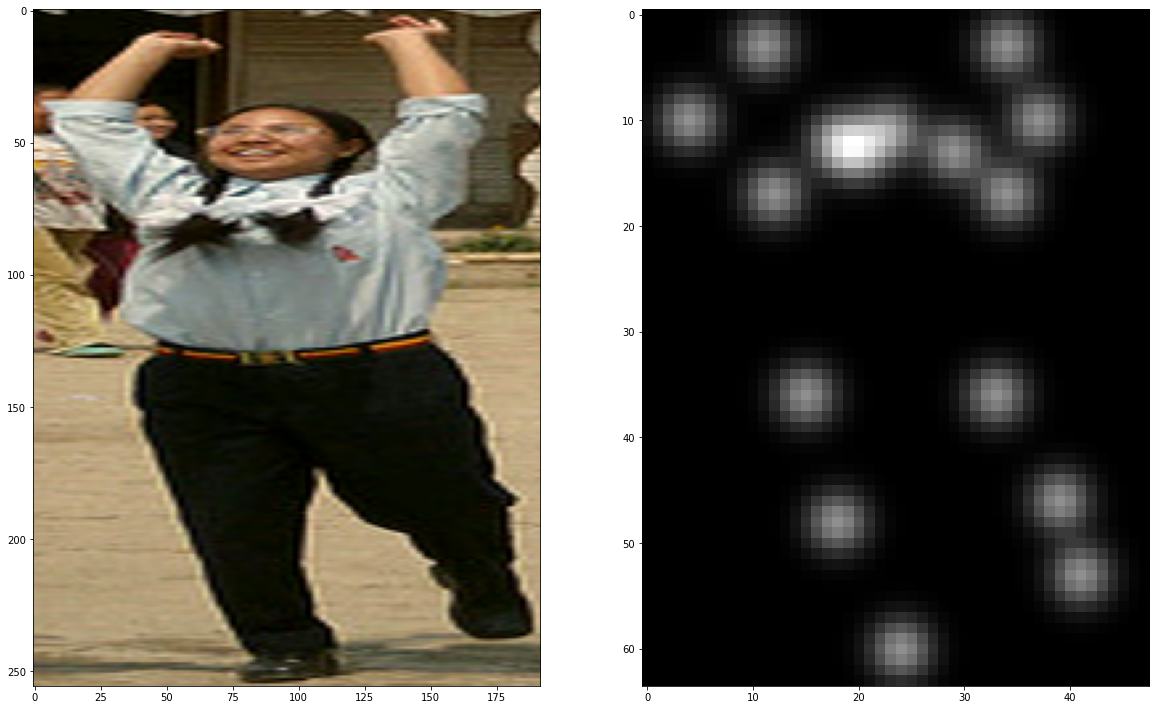

In [97]:
print("GROUNDTRUTH HEATMAP")
plotting_data(single_cv_img,single_cv_gt_heatmap,single_cv_gt_validity)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


PREDICTED HEATMAP


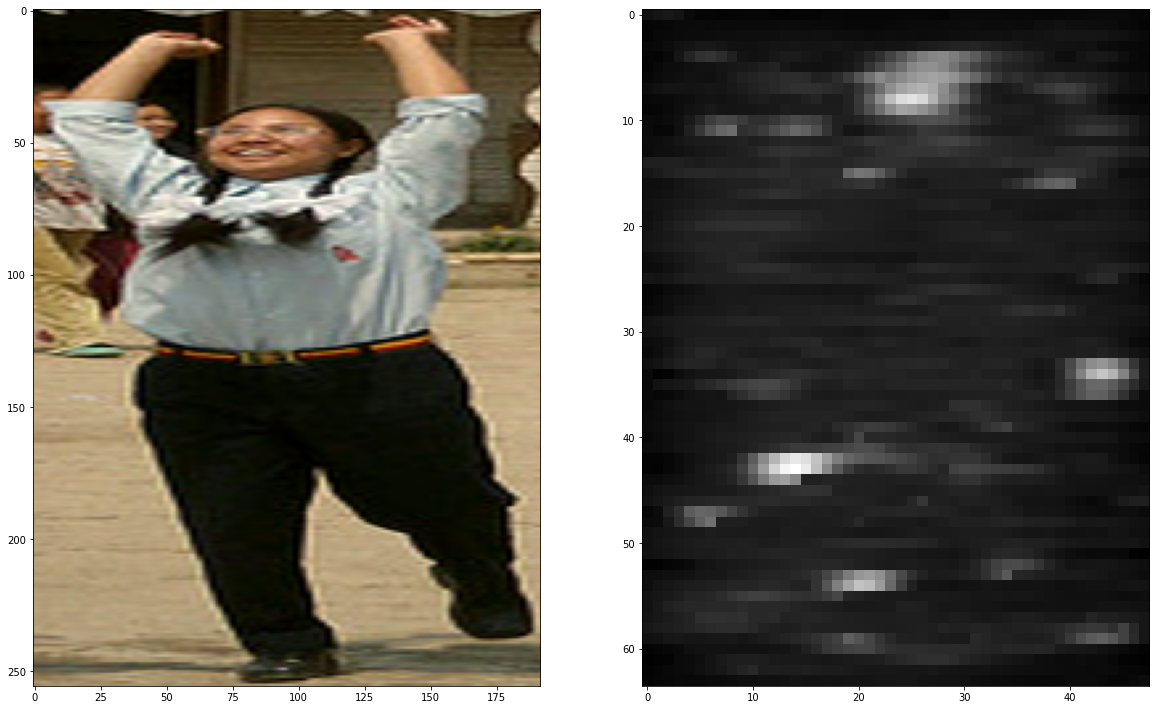

In [98]:
print("PREDICTED HEATMAP")
plotting_data(single_cv_img,cv_img_heatmap_pred.numpy(),single_cv_gt_validity)

In [86]:
train_images = os.listdir("/content/drive/MyDrive/Pose estimation/person_train_images")
train_datagen = train_generator(train_images,training_annotations,batch_size=batch_size)

In [74]:
train_imgs_batch,train_gt_heatmaps_batch,train_gt_validities_batch = next(train_datagen)
single_train_img = train_imgs_batch[0,:,:,:]
single_train_img = single_train_img.reshape(1,single_train_img.shape[0],single_train_img.shape[1],
                                            single_train_img.shape[2])
single_train_gt_heatmap = train_gt_heatmaps_batch[0,:,:,:]
single_train_gt_heatmap = single_train_gt_heatmap.reshape(1,single_train_gt_heatmap.shape[0],
                                                          single_train_gt_heatmap.shape[1],
                                                          single_train_gt_heatmap.shape[2])
single_train_gt_validity = train_gt_validities_batch[0,:,:,:]
single_train_gt_validity = single_train_gt_validity.reshape(1,single_train_gt_validity.shape[0],
                                                            single_train_gt_validity.shape[1],
                                                            single_train_gt_validity.shape[2])

GROUNDTRUTH HEATMAP


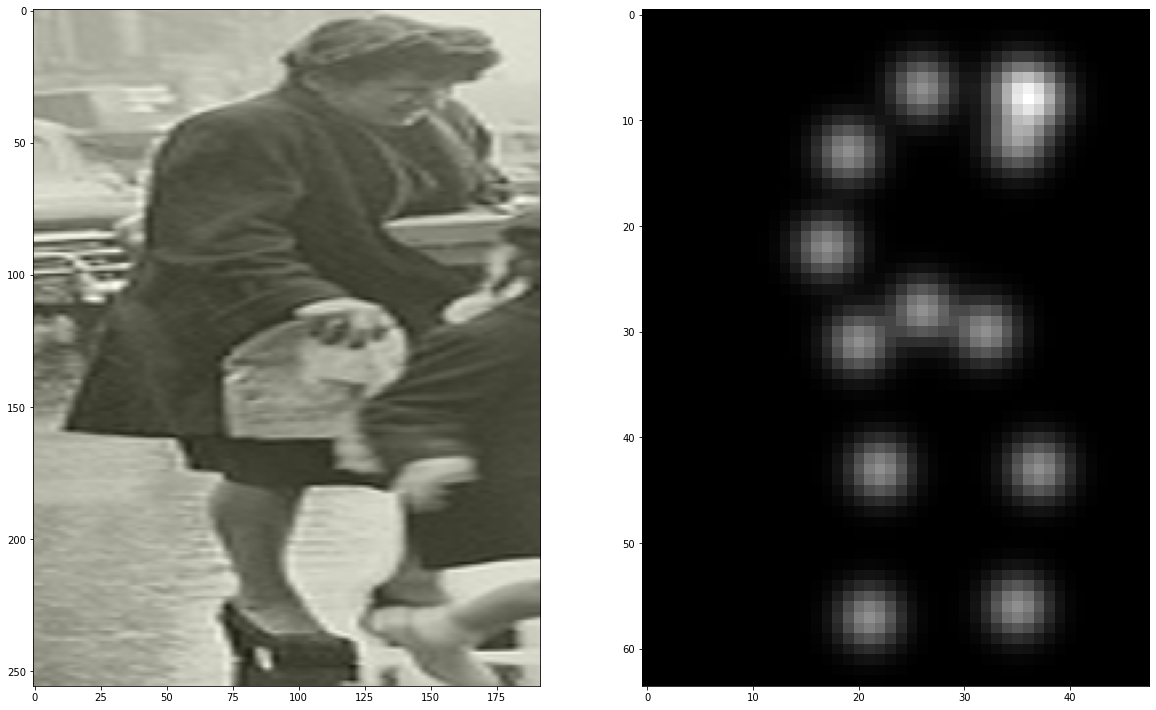

In [75]:
print("GROUNDTRUTH HEATMAP")
plotting_data(single_train_img,single_train_gt_heatmap,single_train_gt_validity)

In [76]:
pretrained_pose_resnet.trainable = False
train_img_heatmap_pred = pretrained_pose_resnet(single_train_img,training=False)

PREDICTED HEATMAP


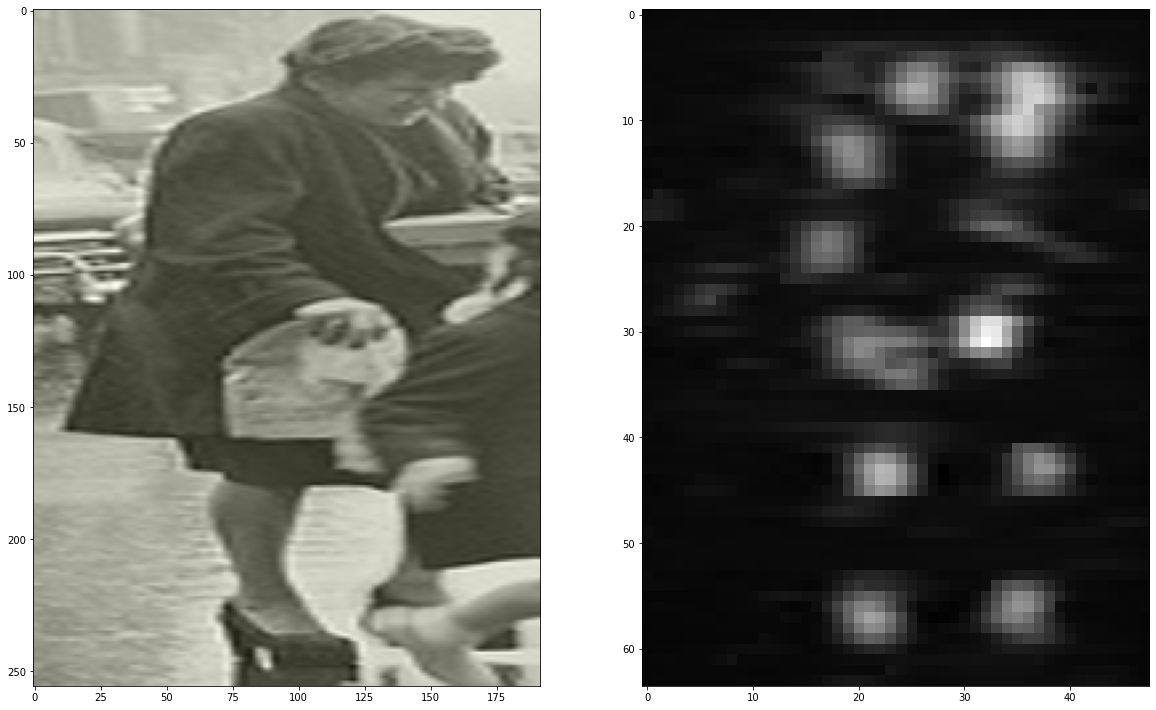

In [77]:
print("PREDICTED HEATMAP")
plotting_data(single_train_img,train_img_heatmap_pred.numpy(),single_train_gt_validity)